## SSD Images Object Bounding Boxes Area and Object types Density Estimation

In [1]:
import os
import pandas as pd

In [2]:
computed_area_dict = {}

In [3]:
sample_ssd_detections_input_file = '../experiments/experiment1/2017_07_15_submission.csv'

In [4]:
reverse_label_map_dict = {'sun':10, 'cloud':7, 'occlusion':0}

In [5]:
reverse_label_map_dict

{'sun': 10, 'cloud': 7, 'occlusion': 0}

In [6]:
pd_ssd_detections = pd.read_csv(sample_ssd_detections_input_file)

In [7]:
pd_ssd_detections.head()

,ImageID,PredictionString
0,/wrk/pnk4/datasets/sky_images/2017_07_15/2017-...,cloud 0.9920766353607178 0.005784929 0.0672174...
1,/wrk/pnk4/datasets/sky_images/2017_07_15/2017-...,cloud 0.9898344874382019 0.01690185 0.0688273 ...
2,/wrk/pnk4/datasets/sky_images/2017_07_15/2017-...,cloud 0.9896740317344666 0.0066896975 0.070608...
3,/wrk/pnk4/datasets/sky_images/2017_07_15/2017-...,cloud 0.988960862159729 0.007936299 0.06922784...
4,/wrk/pnk4/datasets/sky_images/2017_07_15/2017-...,cloud 0.9519343376159668 0.058394164 0.0826061...


In [8]:
pd_ssd_detections.describe()

,ImageID,PredictionString
count,11528,10105
unique,11528,10105
top,/wrk/pnk4/datasets/sky_images/2017_07_15/2017-...,cloud 0.9999125003814697 0.063191265 0.3222299...
freq,1,1


In [9]:
sun_area_list = []
cloud_area_list = []
occlusion_area_list = []
object_type_list = []

for i in range(len(pd_ssd_detections)):
    img_detection_data = pd_ssd_detections.loc[i]
    
    try:
        
        img_coordinates = pd_ssd_detections.loc[i][1].split()
        
        object_type = img_coordinates[0]
        object_type_list.append(reverse_label_map_dict[object_type])
        
        ymin =  float(img_coordinates[2])
        xmin =  float(img_coordinates[3])
        ymax =  float(img_coordinates[4])
        xmax =  float(img_coordinates[5])

        w = (xmax - xmin) # Scaled
        h = (ymax - ymin) # Scaled

        area = w * h
        
        if object_type == 'sun':
            sun_area_list.append(area)
            
        if object_type == 'cloud':
            cloud_area_list.append(area)
            
        if object_type == 'occlusion':
            occlusion_area_list.append(area)
        
    except:
        pass

In [10]:
print("Sun: ", sun_area_list[:3], "\nCloud: ", cloud_area_list[:3], "\nOcclusion: ", occlusion_area_list[:3])

Sun:  [0.0057078763025400015, 0.005707041041360399, 0.005739060746150993] 
Cloud:  [0.8072423520160744, 0.775777703755387, 0.8013600483998726] 
Occlusion:  [0.021479038541170017, 0.02621961924013949, 0.026978674726025977]


In [11]:
len(sun_area_list), len(cloud_area_list), len(occlusion_area_list)

(1047, 8461, 597)

In [12]:
min(sun_area_list), min(cloud_area_list), min(occlusion_area_list)

(0.001981686042671304, 0.001984235198749999, 0.0035868679707665007)

In [13]:
max(sun_area_list), max(cloud_area_list), max(occlusion_area_list)

(0.006912032232415195, 0.8375220216515655, 0.099469733907654)

In [14]:
sun_area_list_series = pd.Series(sun_area_list)

In [15]:
cloud_area_list_series = pd.Series(cloud_area_list)

In [16]:
occlusion_area_list_series = pd.Series(occlusion_area_list)

In [17]:
object_type_list_series = pd.Series(object_type_list)

In [18]:
sun_area_list_series.describe()

count    1047.000000
mean        0.004947
std         0.000904
min         0.001982
25%         0.004745
50%         0.005198
75%         0.005440
max         0.006912
dtype: float64

In [19]:
cloud_area_list_series.describe()

count    8461.000000
mean        0.219006
std         0.217333
min         0.001984
25%         0.042899
50%         0.123669
75%         0.427029
max         0.837522
dtype: float64

In [20]:
occlusion_area_list_series.describe()

count    597.000000
mean       0.011537
std        0.010390
min        0.003587
25%        0.007695
50%        0.009382
75%        0.011038
max        0.099470
dtype: float64

In [21]:
object_type_list_series.describe()

count    10105.000000
mean         6.897279
std          1.953775
min          0.000000
25%          7.000000
50%          7.000000
75%          7.000000
max         10.000000
dtype: float64

In [22]:
object_type_list_series[:5]

0    7
1    7
2    7
3    7
4    7
dtype: int64

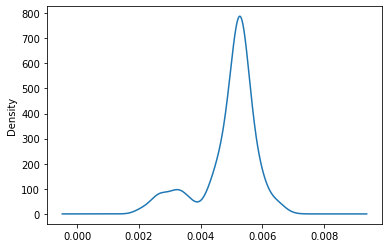

In [23]:
ax = sun_area_list_series.plot.kde()

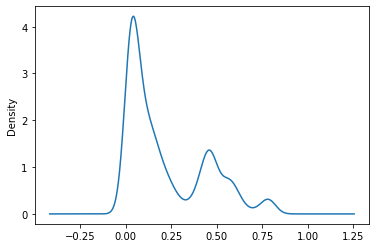

In [24]:
bx = cloud_area_list_series.plot.kde()

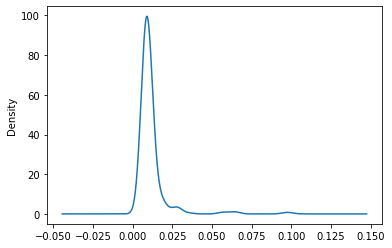

In [25]:
cx = occlusion_area_list_series.plot.kde()

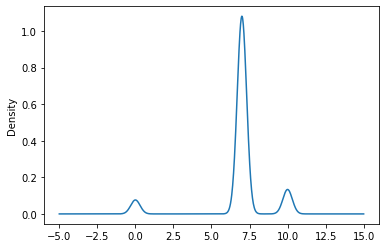

In [26]:
dx = object_type_list_series.plot.kde()

In [27]:
%matplotlib inline

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
img = mpimg.imread('../experiments/experiment1/2017_07_15/2017-07-15--15-48-35.jpg')

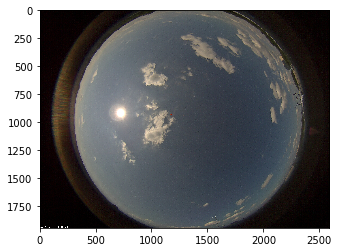

In [30]:
imgplot = plt.imshow(img)